# Name : Tanmay Dnyaneshwar Nigade

# Registration No : INBT010277

# Task No : 01

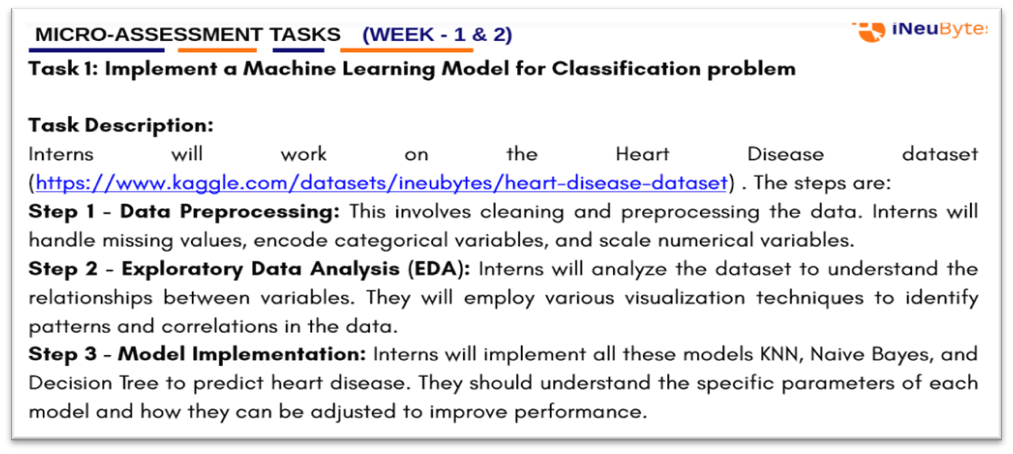

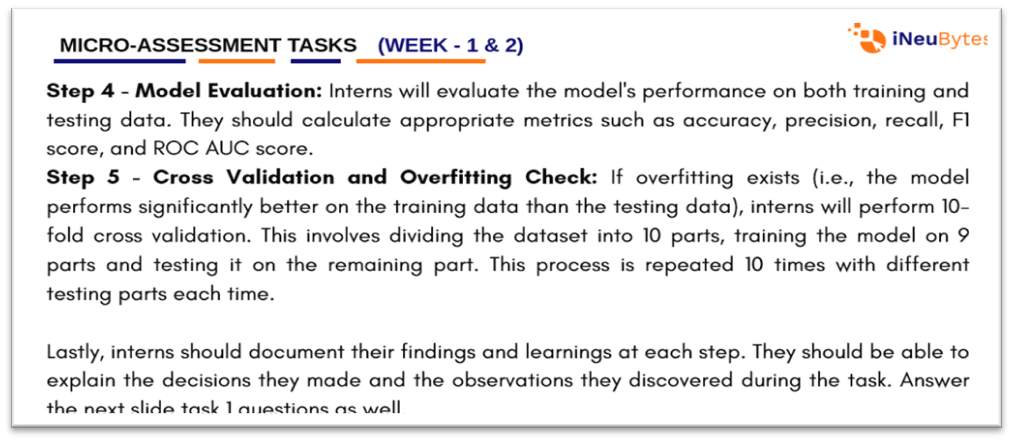

# Step 1: Data Preprocessing

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset from a local file
data_path = 'dataset.csv'  # Update with your actual file path
data = pd.read_csv(data_path)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Encode categorical variables
label_encoders = {}
for column in data_imputed.columns:
    if data_imputed[column].dtype == object:
        le = LabelEncoder()
        data_imputed[column] = le.fit_transform(data_imputed[column])
        label_encoders[column] = le

# Separate features and target variable
X = data_imputed.drop('target', axis=1)  # Features
y = data_imputed['target']               # Target

# Scale numerical variables (only features)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Step 2: Exploratory Data Analysis (EDA)

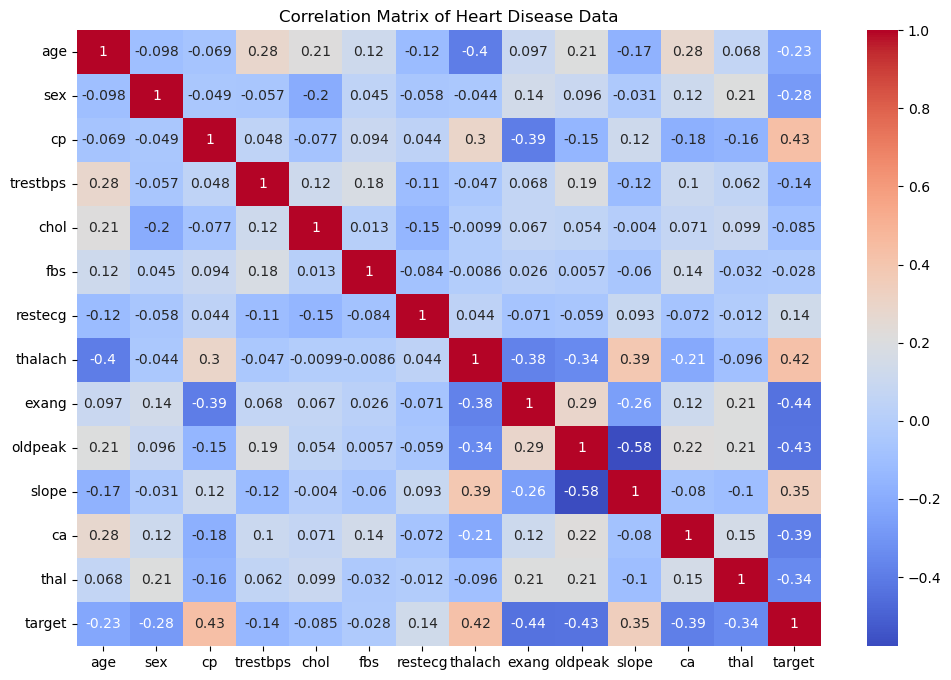

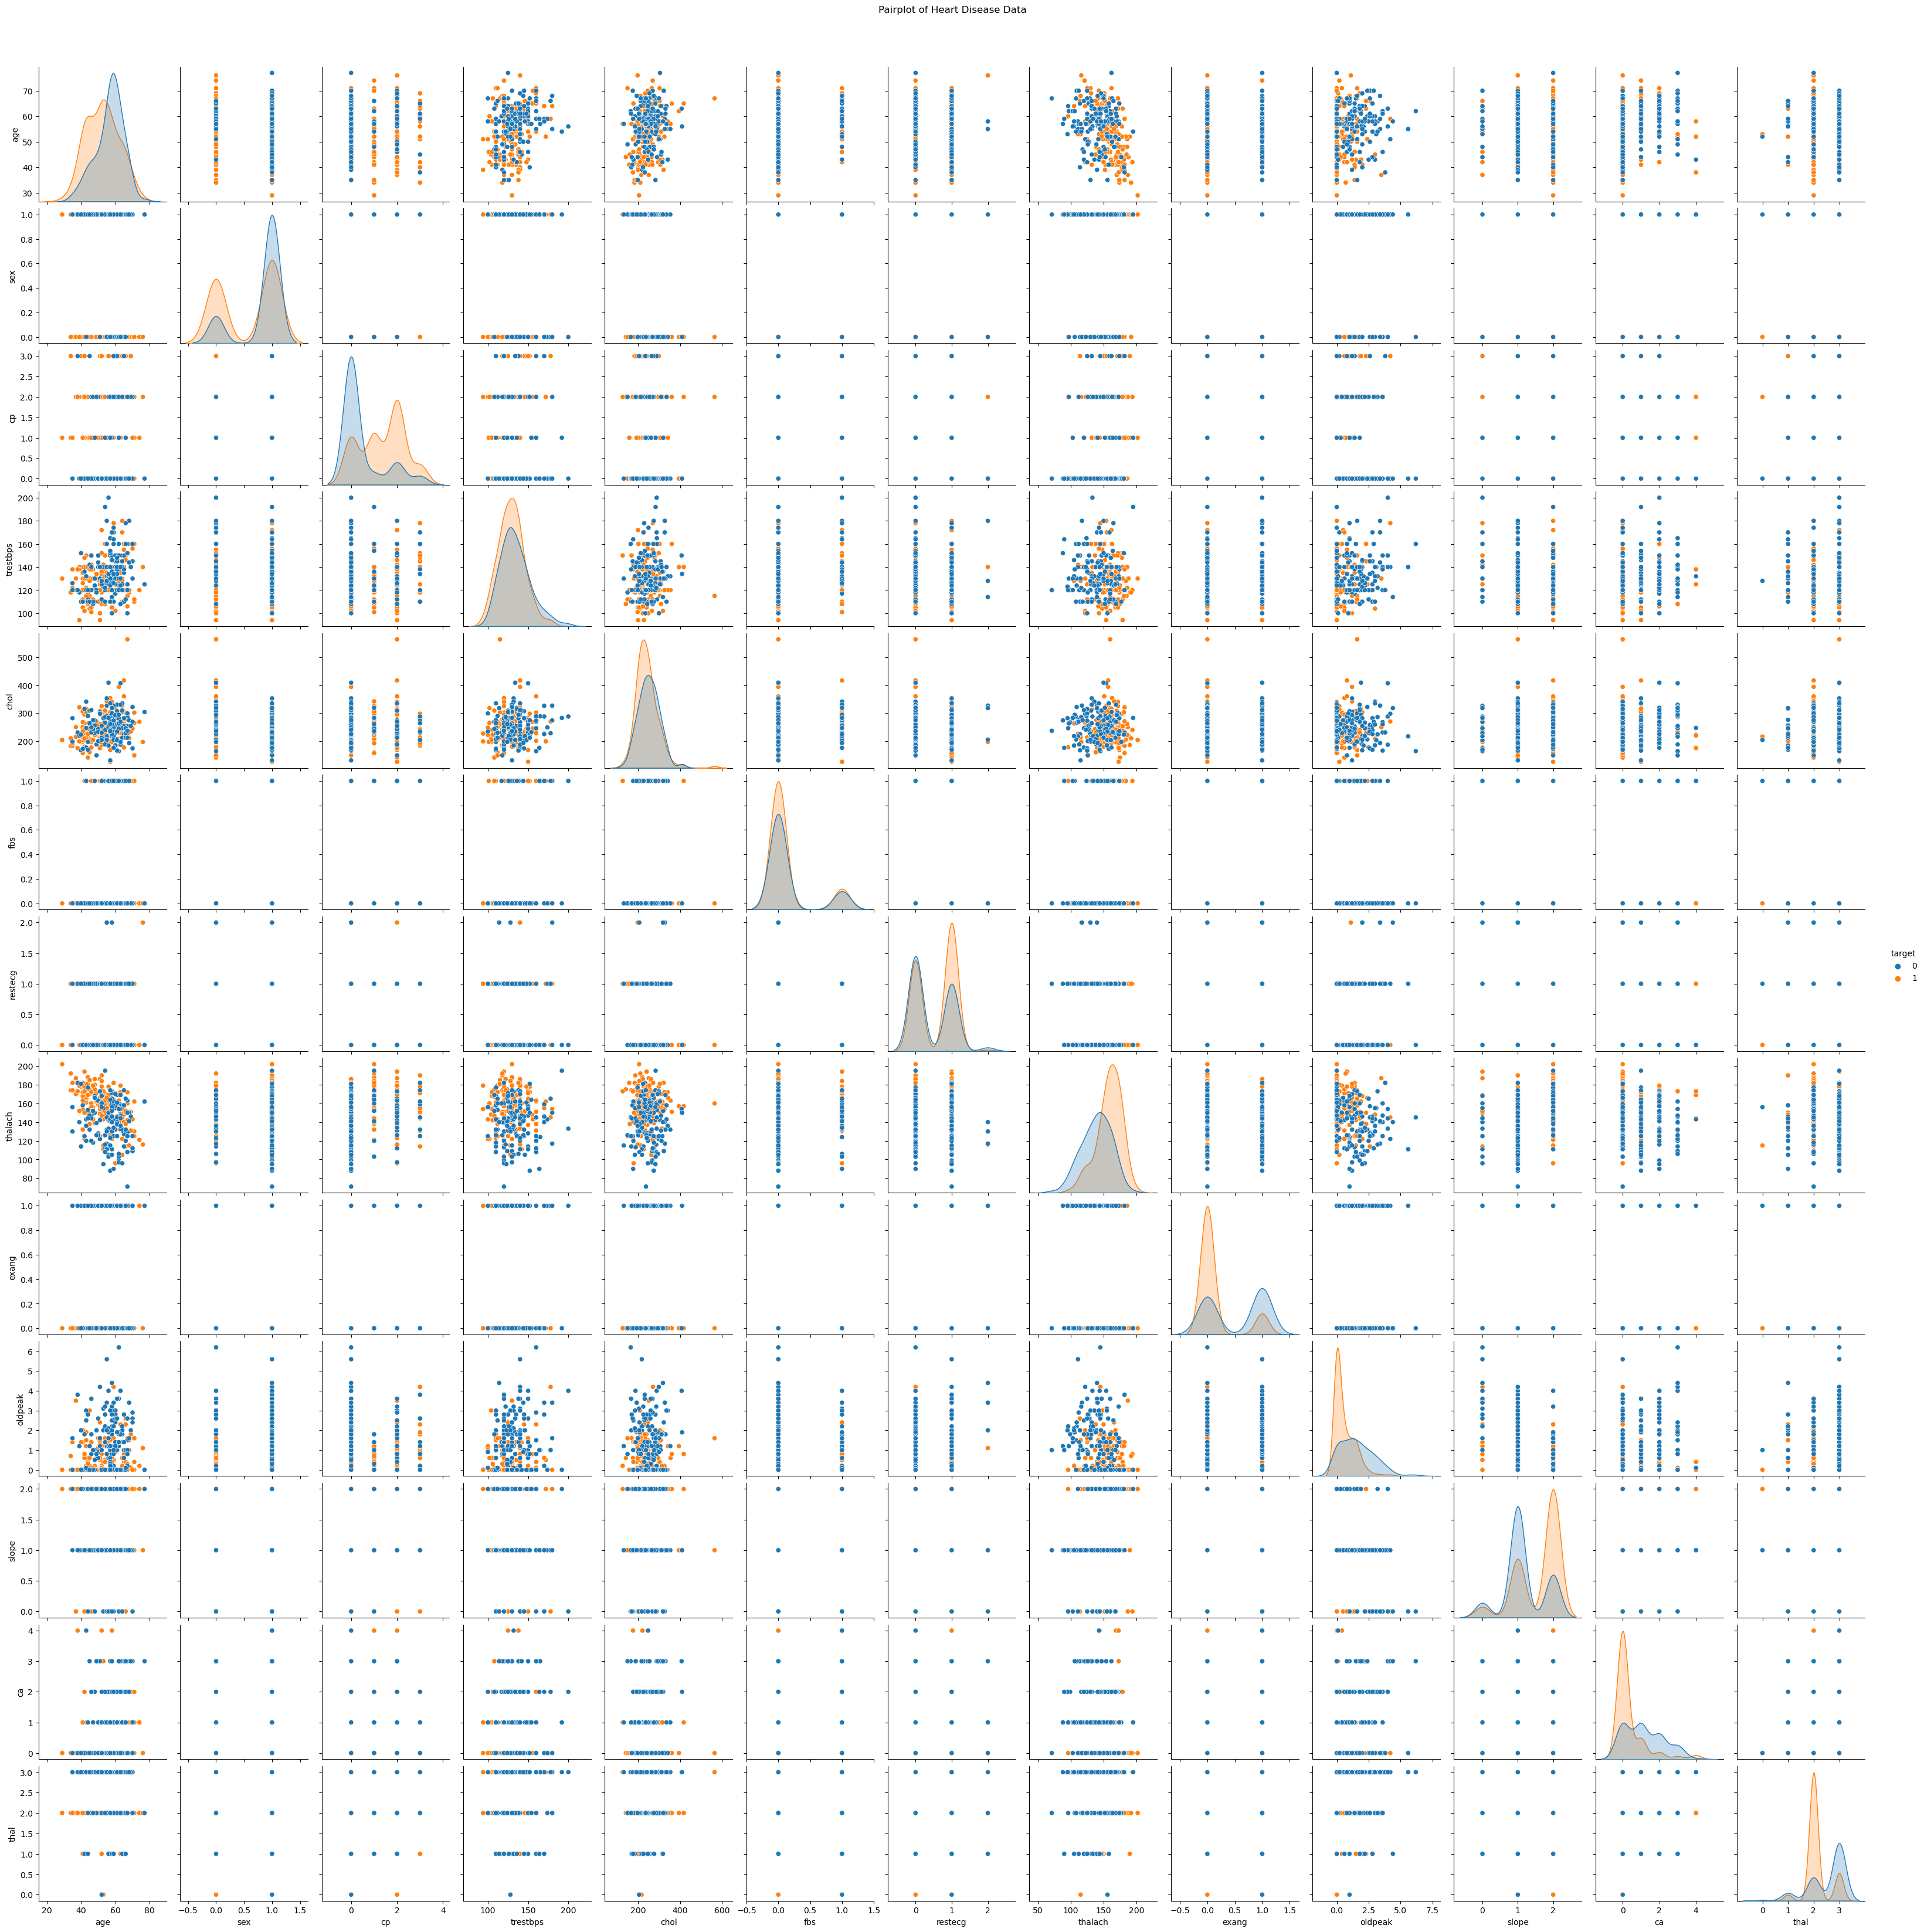

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Heart Disease Data")
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(data, hue='target')
plt.suptitle("Pairplot of Heart Disease Data", y=1.02)
plt.show()


# Step 3: Model Implementation

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Initialize machine learning models
knn_model = KNeighborsClassifier(n_neighbors=5)  # Can tune this parameter later
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)

# Train the models
knn_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# Step 4: Model Evaluation 

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")

# Evaluate KNN model
print("KNN Model Evaluation")
evaluate_model(knn_model, X_test, y_test)

# Evaluate Naive Bayes model
print("\nNaive Bayes Model Evaluation")
evaluate_model(nb_model, X_test, y_test)

# Evaluate Decision Tree model
print("\nDecision Tree Model Evaluation")
evaluate_model(dt_model, X_test, y_test)


KNN Model Evaluation
Accuracy: 0.9180
Precision: 0.9355
Recall: 0.9062
F1 Score: 0.9206
ROC AUC Score: 0.9186

Naive Bayes Model Evaluation
Accuracy: 0.8689
Precision: 0.9000
Recall: 0.8438
F1 Score: 0.8710
ROC AUC Score: 0.8702

Decision Tree Model Evaluation
Accuracy: 0.7541
Precision: 0.8400
Recall: 0.6562
F1 Score: 0.7368
ROC AUC Score: 0.7592


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Step 5: Cross Validation and Overfitting Check

In [11]:
from sklearn.model_selection import cross_val_score

# Function to perform cross-validation
def perform_cross_validation(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=10)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {cv_scores.mean():.4f}")

# Cross-validation for KNN
print("\nKNN Cross-validation")
perform_cross_validation(knn_model, X_train, y_train)

# Cross-validation for Naive Bayes
print("\nNaive Bayes Cross-validation")
perform_cross_validation(nb_model, X_train, y_train)

# Cross-validation for Decision Tree
print("\nDecision Tree Cross-validation")
perform_cross_validation(dt_model, X_train, y_train)



KNN Cross-validation
Cross-validation scores: [0.76       0.88       0.79166667 0.79166667 0.79166667 0.75
 0.625      0.875      0.79166667 0.83333333]
Mean CV score: 0.7890

Naive Bayes Cross-validation
Cross-validation scores: [0.8        0.76       0.91666667 0.83333333 0.875      0.70833333
 0.79166667 0.79166667 0.70833333 0.75      ]
Mean CV score: 0.7935

Decision Tree Cross-validation
Cross-validation scores: [0.68       0.76       0.79166667 0.79166667 0.66666667 0.625
 0.58333333 0.75       0.83333333 0.66666667]
Mean CV score: 0.7148


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo